In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
guazi_bj = pd.read_csv("guazi_bj.csv")
guazi_gz = pd.read_csv("guazi_gz.csv")
guazi_sh = pd.read_csv("guazi_sh.csv")
guazi_sz = pd.read_csv("guazi_sz.csv")

guazi = pd.concat([guazi_bj,guazi_gz,guazi_sh,guazi_sz],axis=0)
guazi.head()

,title,brand,buy_time,km,speedbox,displacement,es_price,new_price,city,year_type,level,suv,horsepower,fuel,length,width,height,owners,drive
0,大众 宝来 2014款 1.6L 自动时尚型,一汽-大众,2014-08,3.82,自动,1.6L,8.0,13.0,北京,2014款,紧凑型,0,105马力,汽油,4523,1775,1467,NaN,前置前驱
1,福特 福睿斯 2015款 1.5L 自动时尚型,长安福特,2015-12,2.35,自动,1.5L,7.8,13.0,北京,2015款,紧凑型,0,113马力,汽油,4587,1825,1490,NaN,前置前驱
2,大众 速腾 2012款 1.6L 自动舒适型,一汽-大众,2012-05,6.67,自动,1.6L,7.0,16.4,北京,2012款,紧凑型,0,105马力,汽油,4644,1778,1482,NaN,前置前驱
3,奔驰C级 2011款 C 200 CGI 时尚型,北京奔驰,2013-01,11.83,自动,1.8T,15.0,42.1,北京,2011款,中型,0,184马力,汽油,4591,1770,1444,NaN,前置后驱
4,大众 帕萨特 2013款 2.0TSI DSG御尊版,上汽大众,2013-11,8.95,自动,2.0T,13.0,27.7,北京,2013款,中型,0,200马力,汽油,4870,1834,1472,NaN,前置前驱


In [3]:
def get_use_year(value):
    if isinstance(value,str):
        datetime_value = datetime.strptime(value,"%Y-%m")
        now = datetime.now()
        yeardelay = (now - datetime_value).total_seconds()/60/60/24/365
        return yeardelay
    return np.NAN
guazi['use_year'] = guazi['buy_time'].apply(get_use_year)
guazi['hedge_rate'] = guazi['es_price'] / guazi['new_price']
guazi[['use_year','km','hedge_rate']].head()

,use_year,km,hedge_rate
0,6.059101,3.82,0.615385
1,4.724855,2.35,0.600000
2,8.311156,6.67,0.426829
3,7.639923,11.83,0.356295
4,6.807046,8.95,0.469314


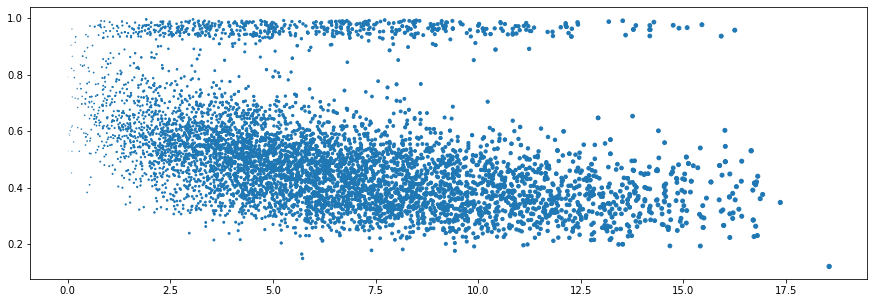

In [4]:
plt.figure(figsize=(15,5))
plt.scatter(guazi['km'],guazi['hedge_rate'],s=guazi['km'])

Text(0, 0.5, 'hedge rate')

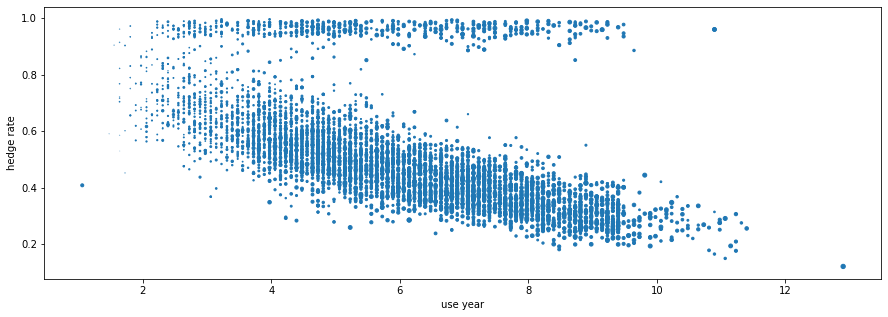

In [5]:
plt.figure(figsize=(15,5))
plt.scatter(guazi['use_year'],guazi['hedge_rate'],s=guazi['km'])
plt.xlabel("use year")
plt.ylabel("hedge rate")

In [6]:
# 筛选异常数据：使用年限大于3年但保值率在0.9以上的认定为异常数据
guazi[(guazi['hedge_rate'] > 0.9) & (guazi['use_year'] > 3)][['new_price','es_price','use_year','km']].head()

,new_price,es_price,use_year,km
21,10.19,10.03,6.554992,7.21
23,23.89,23.57,3.722115,2.29
24,5.30,5.19,6.478279,3.42
30,3.30,3.15,8.642663,11.26
34,10.10,9.70,5.226225,7.21


In [7]:
# 筛选异常数据：里程大于6万公里但保值率在0.9以上的认定为异常数据
guazi[(guazi['hedge_rate'] > 0.9) & (guazi['km'] > 6)][['new_price','es_price','use_year','km']].head()

,new_price,es_price,use_year,km
21,10.19,10.03,6.554992,7.21
30,3.30,3.15,8.642663,11.26
34,10.10,9.70,5.226225,7.21
39,10.24,10.00,7.311156,6.86
51,20.81,20.60,5.891978,6.69


# 观察结果：
1. 通过以上分析，我们可以看到汽车的保值率是随着使用年份和行驶公里数的增加呈现线性下降的。
2. 有一部分数据引起我们的注意，就是保值率大于0.9，并且使用年份和行驶公里数都比较大的数据，我们可以看出这类数据基本上可以算是异常数据了，因此以后在分析的时候就可以处理掉这部分数据了。